# U.S. Medical Insurance Costs

## Loading the data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import util
import statistics

# sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler


# statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# other
from scipy.stats import f_oneway

medical_data = pd.read_csv("data/insurance.csv", delimiter = ",")

print(medical_data.info())
display(medical_data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## EDA

### Checking for duplicates

In [2]:
# start by checking for duplicates
print(medical_data[medical_data.duplicated(keep = False)])

medical_data = medical_data.drop_duplicates().reset_index(drop = True)
print(len(medical_data))

     age   sex    bmi  children smoker     region    charges
195   19  male  30.59         0     no  northwest  1639.5631
581   19  male  30.59         0     no  northwest  1639.5631
1337


### Univariate analysis

#### Age

In [3]:
# check for missing values
print(medical_data["age"].sort_values(ascending = True).unique())

[18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64]


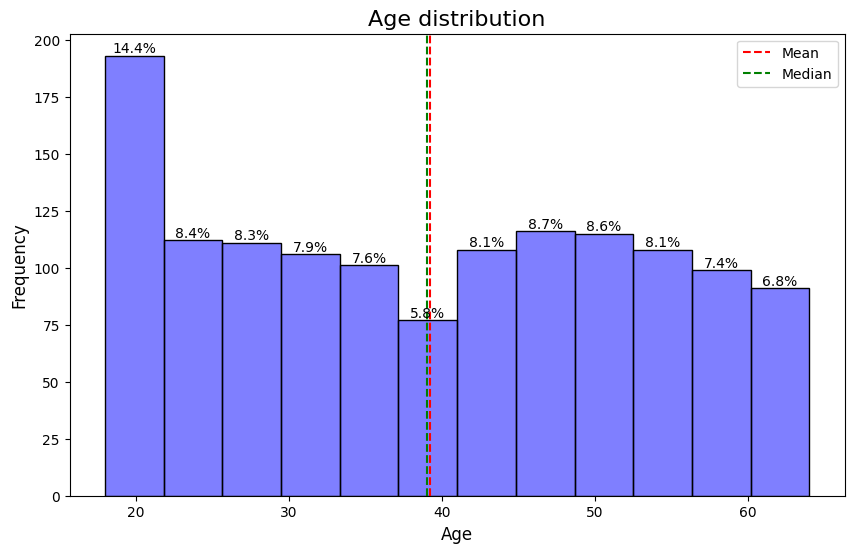

Average age: 39.222139117427076
Median age: 39.0
Age range: 46


<Figure size 640x480 with 0 Axes>

In [4]:
age_avg = np.mean(medical_data["age"])
age_median = np.median(medical_data["age"])
age_max = max(medical_data["age"])
age_min = min(medical_data["age"])

util.make_histplot(medical_data["age"], "Age")

print("Average age: {}".format(age_avg))
print("Median age: {}".format(age_median))
print("Age range: {}".format(age_max - age_min))

Findings:
- Age is not normally distributed in this dataset.
- There is a noticeable concentration of patients in the lower tail of the distribution.
    - The first bin in the histogram is almost double than all other bins.
- Besides the relatively large initial bin, there is also a relatively small bin in the middle of the distribution (people near 40 years of age).
- Apart from these two oddities, all other bins consistently represent around 7% to 8.7% of all users.
- There don't appear to be any outliers present.

#### BMI

In [5]:
# check for missing values
print(medical_data["bmi"].sort_values(ascending = True).unique())

[15.96  16.815 17.195 17.29  17.385 17.4   17.48  17.67  17.765 17.8
 17.86  17.955 18.05  18.3   18.335 18.5   18.6   18.715 18.905 19.
 19.095 19.19  19.3   19.475 19.57  19.8   19.855 19.95  20.045 20.1
 20.13  20.235 20.3   20.35  20.4   20.425 20.52  20.6   20.615 20.7
 20.79  20.8   20.9   21.01  21.09  21.12  21.28  21.3   21.375 21.4
 21.47  21.5   21.56  21.565 21.66  21.7   21.755 21.78  21.8   21.85
 21.89  21.945 22.    22.04  22.1   22.135 22.22  22.23  22.3   22.42
 22.515 22.6   22.61  22.705 22.77  22.8   22.88  22.895 22.99  23.
 23.085 23.1   23.18  23.2   23.21  23.275 23.3   23.32  23.37  23.4
 23.465 23.54  23.56  23.6   23.65  23.655 23.7   23.75  23.76  23.8
 23.845 23.87  23.9   23.94  23.98  24.035 24.09  24.1   24.13  24.225
 24.3   24.31  24.32  24.4   24.415 24.42  24.51  24.53  24.6   24.605
 24.64  24.7   24.75  24.795 24.86  24.89  24.97  24.985 25.    25.08
 25.1   25.175 25.2   25.27  25.3   25.365 25.4   25.41  25.46  25.52
 25.555 25.6   25.65  25.7  

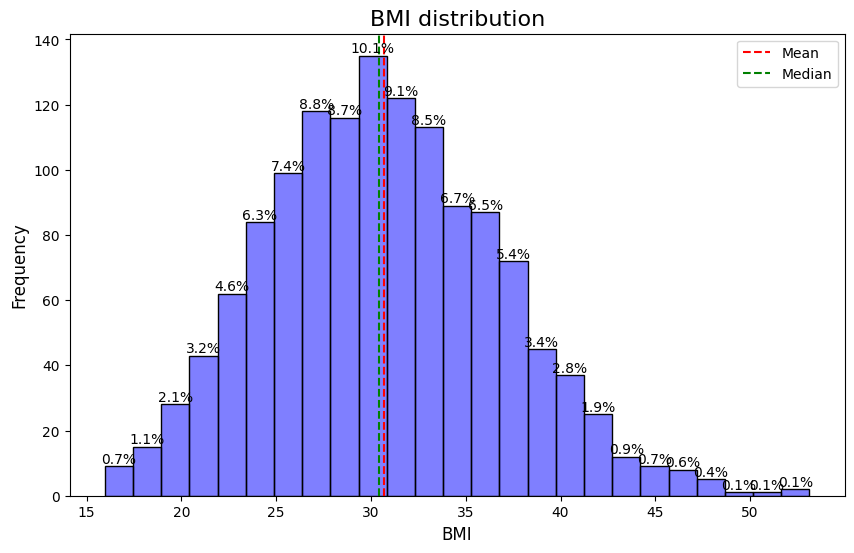

Average BMI: 30.66345175766642
Median BMI: 30.4
BMI range: 37.17


<Figure size 640x480 with 0 Axes>

In [6]:
bmi_avg = np.average(medical_data["bmi"])
bmi_median = np.median(medical_data["bmi"])
bmi_min = min(medical_data["bmi"])
bmi_max = max(medical_data["bmi"])

util.make_histplot(medical_data["bmi"], "BMI")

print("Average BMI: {}".format(bmi_avg))
print("Median BMI: {}".format(bmi_median))
print("BMI range: {}".format(bmi_max - bmi_min))

Findings:
- Patients' BMI appears to be mostly normally distributed, although the right tail of the distribution is slightly longer than the left one.
- This slight skewness could imply that there are outliers, so it'll be necessary to check for that.

In [7]:
### checking for outliers
bmi_q1 = np.quantile(medical_data["bmi"], 0.25)
bmi_q3 = np.quantile(medical_data["bmi"], 0.75)
bmi_iqr = bmi_q3 - bmi_q1
bmi_outliers = 0

for i in medical_data["bmi"]:
    if i > (bmi_q3 + (bmi_iqr * 1.5)):
        print("Upper outlier at BMI of {}".format(i))
        bmi_outliers += 1
    elif i < (bmi_q1 - (bmi_iqr * 1.5)):
        print("Lower outlier at BMI: {}".format(i))
        bmi_outliers += 1
    else:
        continue

print("Upper threshold: {:.1f}".format(bmi_q3 + (bmi_iqr *1.5)))
print("\nOutliers found: {}".format(bmi_outliers))

Upper outlier at BMI of 49.06
Upper outlier at BMI of 48.07
Upper outlier at BMI of 47.52
Upper outlier at BMI of 47.41
Upper outlier at BMI of 50.38
Upper outlier at BMI of 47.6
Upper outlier at BMI of 52.58
Upper outlier at BMI of 47.74
Upper outlier at BMI of 53.13
Upper threshold: 47.3

Outliers found: 9


Due to how insurance works, it's common for obese patients (BMI > 30) to experience a steep increase in what they pay, so, in order to account for this, a binary variable for whether the patient is obese or not will be added.

In [8]:
medical_data["is_obese"] = [True if i > 30 else False for i in medical_data["bmi"]]
display(medical_data[["bmi", "is_obese"]])

,bmi,is_obese
0,27.900,False
1,33.770,True
2,33.000,True
3,22.705,False
4,28.880,False
...,...,...
1332,30.970,True
1333,31.920,True
1334,36.850,True
1335,25.800,False


Findings:
- A total of 9 outliers were found.
- All of the outliers are in the higher values of the distribution.
    - Out of these, 4 of them at at less than 1 BMI point from the threshold, though they still fall outside it.
    - The other 5 outliers present more extreme values.
- Given that it's not just a single extreme value, it wouldn't be fair to leave it out.
    - The fact that 9 values fall within this range indicates that, while uncommon, this is a trait of the distribution and not just a random occurrence.

#### Children

In [9]:
# check for missing values
print(medical_data["children"].sort_values(ascending = True).unique())

[0 1 2 3 4 5]


c:\Users\david\OneDrive\Escritorio\Trabajo\Python\0_portfolio_projects\1_us_insurance_costs\util.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = data, palette = "bright", stat = "percent")


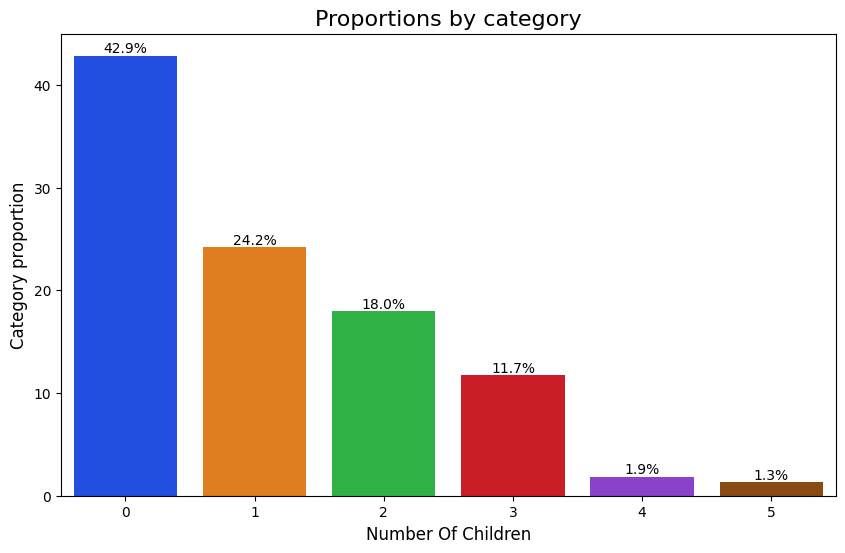

Average number of children: 1.0957367240089753
Median number of children: 1.0


<Figure size 640x480 with 0 Axes>

In [10]:
children_avg = np.mean(medical_data["children"])
children_median = np.median(medical_data["children"])

util.make_countplot(medical_data["children"], "Number of children")

print("Average number of children: {}".format(children_avg))
print("Median number of children: {}".format(children_median))

Findings:
- Almost 43% of patients have no children.
- Patients with 3 or more kids represent a minority in the population. Parents of 3, 4, and 5 children put together represent less than 15% of the entire dataset.
- Even though both the mean and median say that patients have on average one child, this group represents less than 1/4 of all observations.

#### Smoker

In [11]:
print(medical_data["smoker"].unique())

['yes' 'no']


In [12]:
# change the way the variable is encoded
medical_data["smoker"] = [1 if i == "yes" else 0 for i in medical_data["smoker"]]
print(medical_data["smoker"].value_counts(normalize = True))

smoker
0    0.795064
1    0.204936
Name: proportion, dtype: float64


Findings:
- The majority of the patients (almost 80% do not smoke)

#### Region

In [13]:
print(medical_data["region"].unique())

['southwest' 'southeast' 'northwest' 'northeast']


c:\Users\david\OneDrive\Escritorio\Trabajo\Python\0_portfolio_projects\1_us_insurance_costs\util.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = data, palette = "bright", stat = "percent")


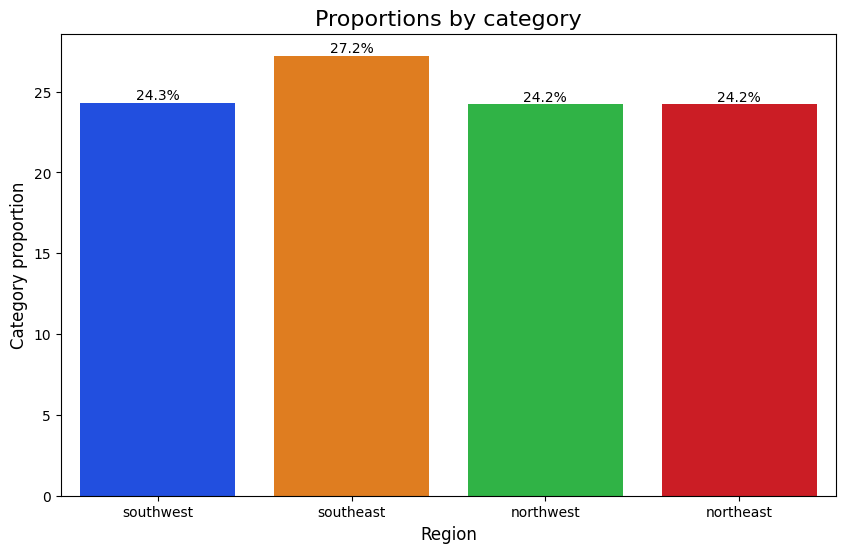

<Figure size 640x480 with 0 Axes>

In [11]:
region_mode = statistics.mode(medical_data["region"])

util.make_countplot(medical_data["region"], "Region")

Findings:
- The four regions appear to be almost evenly distributed, with the only one being slightly more prevalent being the Southeast.
- Given that this is a categorical variable, one-hot encoding will be necessary later on.

#### Charges

In [15]:
print(medical_data["charges"].sort_values(ascending = True))

939      1121.87390
807      1131.50660
1243     1135.94070
662      1136.39940
22       1137.01100
           ...     
818     55135.40209
577     58571.07448
1229    60021.39897
1299    62592.87309
543     63770.42801
Name: charges, Length: 1337, dtype: float64


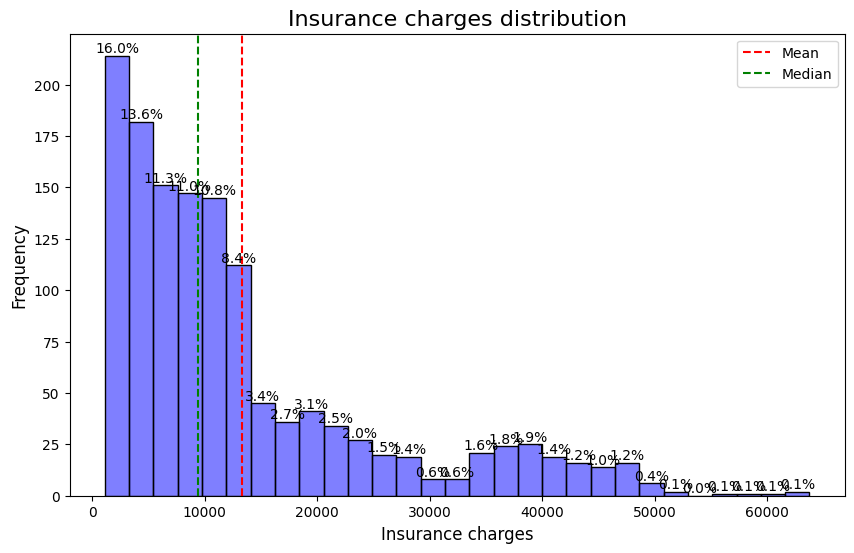

Average insurance cost: 13279.121486655948
Median insurance cost: 9386.1613


<Figure size 640x480 with 0 Axes>

In [16]:
charges_avg = np.mean(medical_data["charges"])
charges_median = np.median(medical_data["charges"])

util.make_histplot(medical_data["charges"], "Insurance charges")

print("Average insurance cost: {}".format(charges_avg))
print("Median insurance cost: {}".format(charges_median))

Since this will be the target variable of our regression, we will also check for outliers (especially because of what can be seen in the histogram), as they can drastically alter the line of best fit of our model.

In [17]:
charges_q1 = np.quantile(medical_data["charges"], 0.25)
charges_q3 = np.quantile(medical_data["charges"], 0.75)
charges_iqr = charges_q3 - charges_q1
outliers = 0

for i in medical_data["charges"]:
    if i > (charges_q3 + (charges_iqr * 1.5)):
        print("Upper outlier at index {} | Insurance cost: {}".format(list(medical_data["charges"]).index(i), i))
        outliers += 1
    elif i < (charges_q1 - (charges_iqr * 1.5)):
        print("Lower outlier at index {} | Insurance cost: {}".format(list(medical_data["charges"]).index(i), i))
        outliers += 1
    else:
        continue

print("Number of outliers identified: {}".format(outliers))

Upper outlier at index 14 | Insurance cost: 39611.7577
Upper outlier at index 19 | Insurance cost: 36837.467
Upper outlier at index 23 | Insurance cost: 37701.8768
Upper outlier at index 29 | Insurance cost: 38711.0
Upper outlier at index 30 | Insurance cost: 35585.576
Upper outlier at index 34 | Insurance cost: 51194.55914
Upper outlier at index 38 | Insurance cost: 39774.2763
Upper outlier at index 39 | Insurance cost: 48173.361
Upper outlier at index 49 | Insurance cost: 38709.176
Upper outlier at index 53 | Insurance cost: 37742.5757
Upper outlier at index 55 | Insurance cost: 47496.49445
Upper outlier at index 82 | Insurance cost: 37165.1638
Upper outlier at index 84 | Insurance cost: 39836.519
Upper outlier at index 86 | Insurance cost: 43578.9394
Upper outlier at index 94 | Insurance cost: 47291.055
Upper outlier at index 109 | Insurance cost: 47055.5321
Upper outlier at index 123 | Insurance cost: 39556.4945
Upper outlier at index 146 | Insurance cost: 40720.55105
Upper outlier

Considering the heavily right-skewed distribution, it could be worth exploring performing a log transformation on the variable.

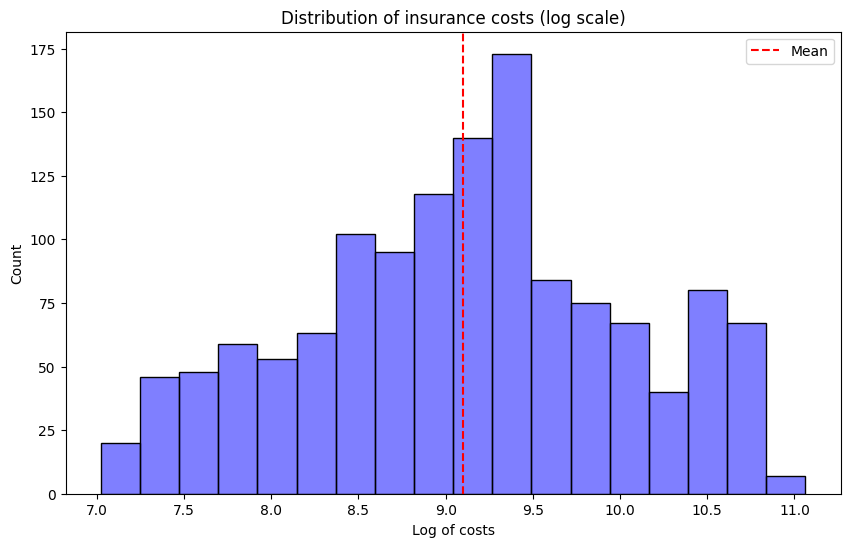

<Figure size 640x480 with 0 Axes>

In [18]:
plt.figure(figsize = (10, 6))
sns.histplot(x = np.log(medical_data["charges"]), color = "blue", alpha = 0.5)
plt.axvline(np.mean(np.log(medical_data["charges"])), color = "red", linestyle = "dashed",label = "Mean")
plt.title("Distribution of insurance costs (log scale)")
plt.xlabel("Log of costs")
plt.legend()
plt.show()
plt.clf()

Findings:
- The distribution is highly right-skewed. Since OLS assumes a normal distribution, the log transformed data (which appears closer to a normal distribution) is preferred.
- While it won't be certain until further exploration, it would be possible to assume that the patients falling on the higher ends of the distribution are those that smoke, have a higher BMI, or have more children.
- The fact that so many patients can be considered outliers indicates that this is not simply a random occurrence, but rather high-cost patients. This appears to be inherent to the distribution, so it wouldn't be wise to drop them.

### Multivariate analysis

#### BMI and age

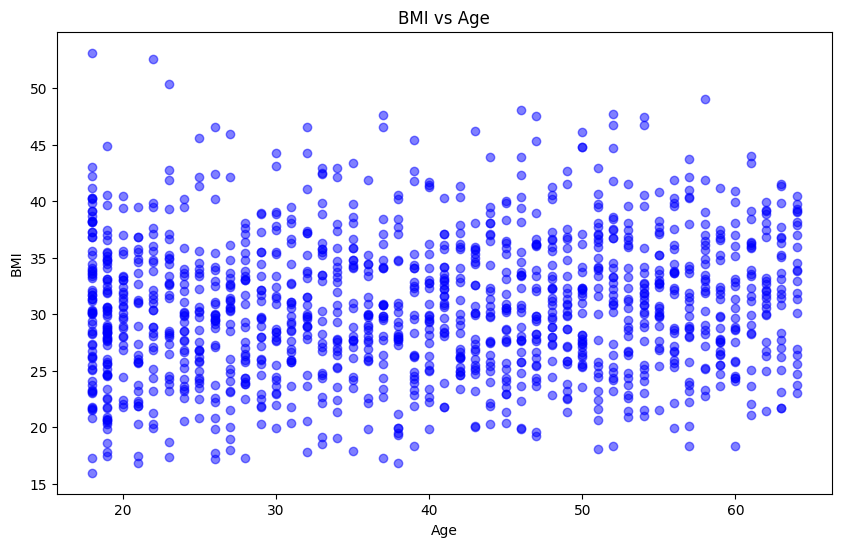

The correlation coefficient for BMI and age is 0.1093


In [19]:
plt.figure(figsize = (10, 6))
plt.scatter(medical_data["age"], medical_data["bmi"], color = "blue", alpha = 0.5)
plt.title("BMI vs Age")
plt.xlabel("Age")
plt.ylabel("BMI")
plt.show()

print("The correlation coefficient for BMI and age is {}".format(round(np.corrcoef(medical_data["age"], medical_data["bmi"])[0][1], 4)))

Findings:
- BMI and age appear to have no significant correlation.
- With a correlation coefficient of less than 0.11, we can practically conclude these two variables are independent.
    - It'll still be necessary to test for joint correlation using the VIF later on, but this is a good starting point.
- This is important in the context of a linear regression, as having correlated regressors can cause collinearity.

#### Region and age

{'Northeast': 39.26851851851852, 'Northwest': 39.25925925925926, 'Southeast': 38.93956043956044, 'Southwest': 39.45538461538462}


C:\Users\david\AppData\Local\Temp\ipykernel_33148\2691463773.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = region_age_dict.keys(), y = region_age_dict.values(), palette = "bright")


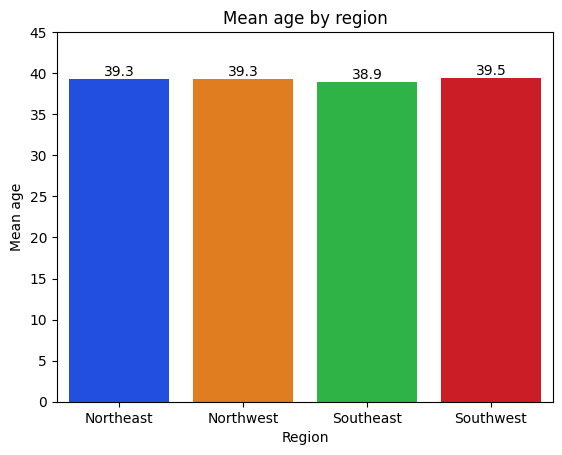

In [20]:
region_age = medical_data.groupby("region")["age"].mean().reset_index()
region_age_dict = {}

for region, age in zip(region_age["region"], region_age["age"]):
    region_age_dict[region.title()] = age

print(region_age_dict)

plt.figure()
ax = sns.barplot(x = region_age_dict.keys(), y = region_age_dict.values(), palette = "bright")

for c in ax.containers:
    ax.bar_label(c, fmt = "{:.1f}")

plt.title("Mean age by region")
plt.xlabel("Region")
plt.ylabel("Mean age")
plt.ylim(0, 45)
plt.show()

Findings:
- There doesn't appear to be any relationship between the region and the age of the patients.
- The average age is practically the exact same across all four regions.

#### BMI and region

C:\Users\david\AppData\Local\Temp\ipykernel_33148\3617383956.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = bmi_region_dict.keys(), y = bmi_region_dict.values(), palette = "bright")


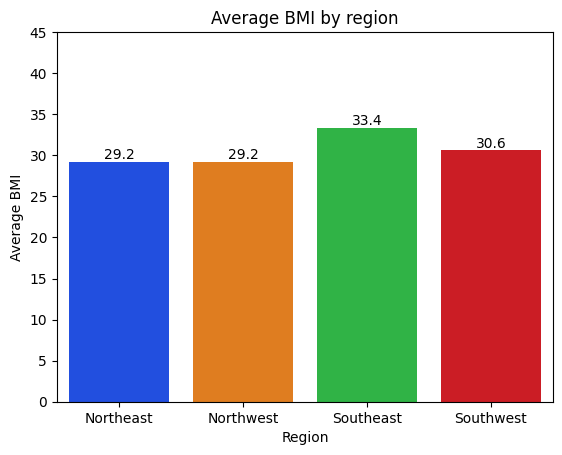

<Figure size 640x480 with 0 Axes>

In [21]:
bmi_region = medical_data.groupby("region")["bmi"].mean().reset_index()
bmi_region_dict = {}

for val, region in zip(bmi_region["bmi"], bmi_region["region"]):
    bmi_region_dict[region.title()] = val

plt.figure()

ax = sns.barplot(x = bmi_region_dict.keys(), y = bmi_region_dict.values(), palette = "bright")

for c in ax.containers:
    ax.bar_label(c, fmt = "{:.1f}")

plt.title("Average BMI by region")
plt.ylabel("Average BMI")
plt.xlabel("Region")
plt.ylim(0, 45)
plt.show()
plt.clf()

Findings:
- The average BMI of the patients is the exact same across the northern regions.
- Southern regions have a higher average BMI, with the southeast being the most noticeable.
- Despite the already apparent differences, it's possible to perform an ANOVA test to determine whether these differences are statistically signfiicant or if they are simply the result of random chance.

##### ANOVA

Remember that for ANOVA testing:<br>
H<sub>0</sub>: μ<sub>1</sub> = μ<sub>2</sub> = ... = μ<sub>n</sub><br>
H<sub>1</sub>: μ<sub>1</sub> != μ<sub>2</sub> != ... != μ<sub>n</sub>

In [22]:
# we start by separating the BMI values for each region
bmi_northeast = medical_data["bmi"][medical_data["region"] == "northeast"]
bmi_northwest = medical_data["bmi"][medical_data["region"] == "northwest"]
bmi_southeast = medical_data["bmi"][medical_data["region"] == "southeast"]
bmi_southwest = medical_data["bmi"][medical_data["region"] == "southwest"]

# get the p-value for the ANOVA test
fstat, pval = f_oneway(bmi_northeast, bmi_northwest, bmi_southeast, bmi_southwest)
print("ANOVA p-value: {}".format(pval))

ANOVA p-value: 1.9087293927440606e-24


With a p-value practically equal to zero, we reject the null hypothesis, meaning that the difference between at least one of the pairwise comparisons is statistically significant.

##### Tukey test

Given that we were able to reject the null hypothesis in our ANOVA test, we can check which of the pairs specifically is the one that is different from the rest.

In [23]:
# we'll check if the standard deviation is the same (or almost the same) across groups
bmi_northeast_std = np.std(medical_data["bmi"][medical_data["region"] == "northeast"])
bmi_northwest_std = np.std(medical_data["bmi"][medical_data["region"] == "northwest"])
bmi_southeast_std = np.std(medical_data["bmi"][medical_data["region"] == "southeast"])
bmi_southwest_std = np.std(medical_data["bmi"][medical_data["region"] == "southwest"])

print("Northeast region std. dev: {}".format(bmi_northeast_std))
print("Northwest region std. dev: {}".format(bmi_northwest_std))
print("Southeast region std. dev: {}".format(bmi_southeast_std))
print("Southwest region std. dev: {}".format(bmi_southwest_std))

Northeast region std. dev: 5.92834339408056
Northwest region std. dev: 5.136182506861401
Southeast region std. dev: 6.468743942813121
Southwest region std. dev: 5.683072375159565


In [24]:
tukey_results = pairwise_tukeyhsd(medical_data["bmi"], medical_data["region"])
print(tukey_results.summary())

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj   lower   upper  reject
----------------------------------------------------------
northeast northwest    0.022    1.0 -1.1608  1.2048  False
northeast southeast   4.1825    0.0  3.0326  5.3324   True
northeast southwest   1.4231 0.0107  0.2412   2.605   True
northwest southeast   4.1605    0.0  3.0106  5.3104   True
northwest southwest   1.4011 0.0125  0.2192   2.583   True
southeast southwest  -2.7594    0.0 -3.9083 -1.6104   True
----------------------------------------------------------


Findings:
- According to our Tukey test, BMI is the same across northern regions.
- BMI is, however, different across northern and southern.
- BMI is also different between the two southern regions.

#### Charges and sex

In [25]:
### check how genders are distributed
print(medical_data["sex"].value_counts(normalize = True))

sex
male      0.504862
female    0.495138
Name: proportion, dtype: float64


C:\Users\david\AppData\Local\Temp\ipykernel_33148\2950376854.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = gender_dict.keys(), y = gender_dict.values(), palette = "bright")


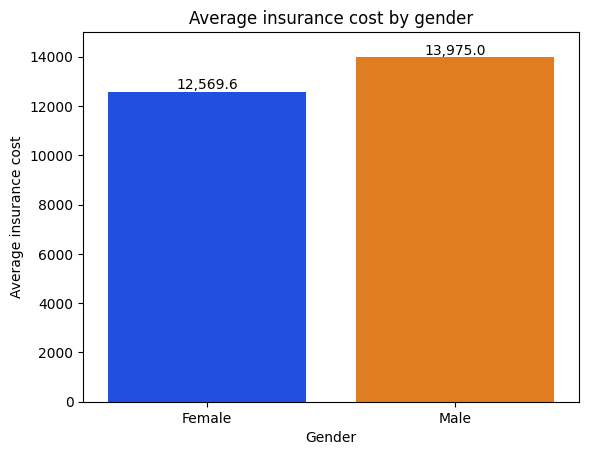

<Figure size 640x480 with 0 Axes>

In [26]:
gender_dist = medical_data.groupby("sex")["charges"].mean().reset_index()
gender_dict = {}

for sex, charge in zip(gender_dist["sex"], gender_dist["charges"]):
    gender_dict[sex.title()] = charge

plt.figure()
ax = sns.barplot(x = gender_dict.keys(), y = gender_dict.values(), palette = "bright")

for c in ax.containers:
    ax.bar_label(c, fmt = "{:,.1f}")

plt.title("Average insurance cost by gender")
plt.xlabel("Gender")
plt.ylabel("Average insurance cost")
plt.ylim(0, 15000)
plt.show()
plt.clf()

Findings:
- Males and females appear to be represented in the same proportions in the sample, with them representing 50.5% and 49.5% respectively.
- The insurance cost for males is around $1,400 higher on average than for females.

##### ANOVA

Once again, we can determine whether this difference is statistically significant or not by using ANOVA.

In [27]:
# separate insurance cost for males and females
charges_male = medical_data["charges"][medical_data["sex"] == "male"]
charges_female = medical_data["charges"][medical_data["sex"] == "female"]

# ANOVA
fstat, pval = f_oneway(charges_male, charges_female)
print("ANOVA p-value: {}".format(pval))

ANOVA p-value: 0.033820791995078286


According to our ANOVA test, there is a statistically significant difference in insurance cost between male and female clients. Now, it's worth noting that the p-value we obtained was quite close to the 0.05 significance threshold, so it's possible that we are seeing a statistically significant difference simply due to the structure of this specific sample.

#### Charges, age, and smoking

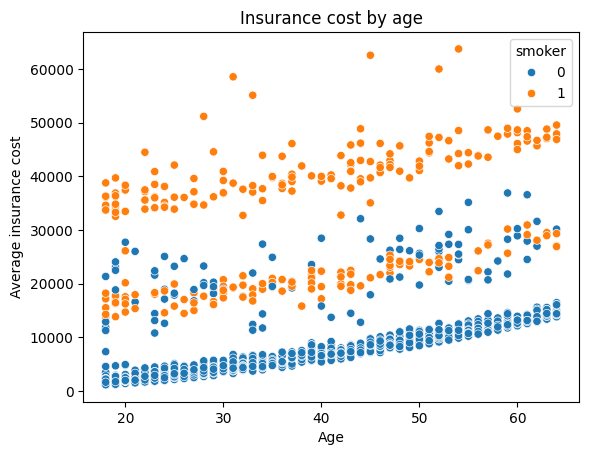

<Figure size 640x480 with 0 Axes>

In [28]:
plt.figure()
sns.scatterplot(x = "age", y = "charges", data = medical_data, color = "blue", hue = "smoker")
plt.title("Insurance cost by age")
plt.xlabel("Age")
plt.ylabel("Average insurance cost")
plt.show()
plt.clf()

Findings:
- There appears to be a somewhat linear relationship between age and insurance cost, although there appear to be 3 distinct parallel clusters.
- We can see that there is a clear correlation between a patient's insurance cost and whether they smoke or not, as smokers are located in the upper range of the costs.
- With this in mind, it might be worth including an interaction term between the age and smoker variables to capture these differences.

#### Charges, BMI, and smoking

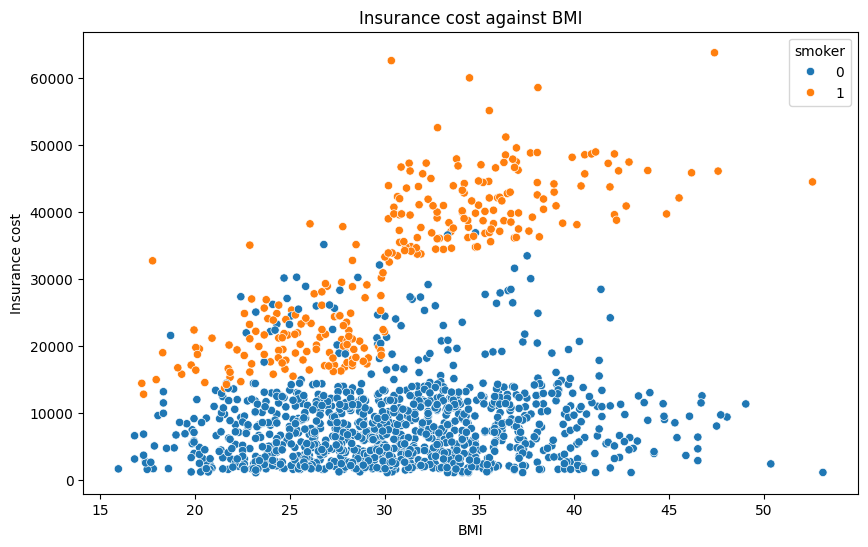

<Figure size 640x480 with 0 Axes>

In [29]:
plt.figure(figsize = (10, 6))
sns.scatterplot(x = "bmi",
                y = "charges",
                hue = "smoker",
                data = medical_data)
plt.title("Insurance cost against BMI")
plt.ylabel("Insurance cost")
plt.xlabel("BMI")
plt.show()
plt.clf()

The two distinct clusters being formed are apparently due to whether the patient smokes or not, so an interaction term between these two variables might be useful for predicting insurance costs.

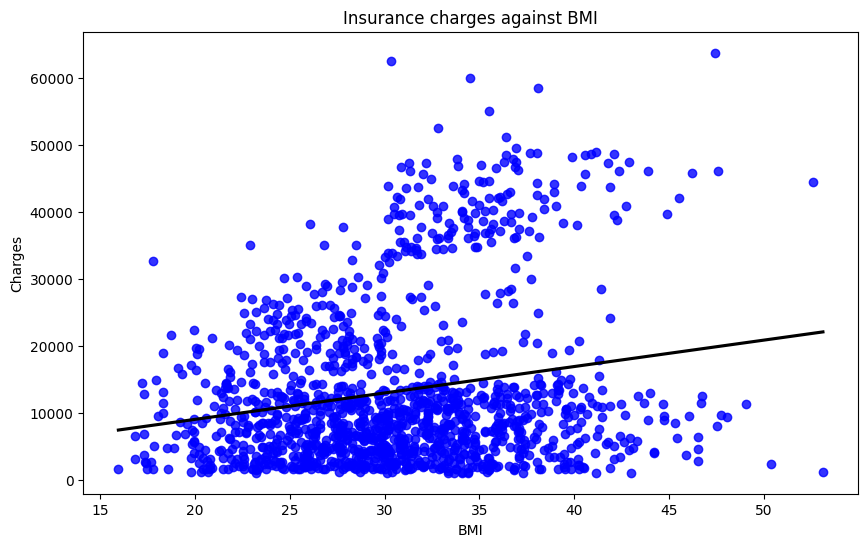

<Figure size 640x480 with 0 Axes>

In [30]:
plt.figure(figsize = (10, 6))
sns.regplot(x = "bmi", 
                y = "charges",
                data = medical_data,
                ci = None,
                scatter_kws = {"color": "blue"},
                line_kws = {"color": "black"})
plt.title("Insurance charges against BMI")
plt.ylabel("Charges")
plt.xlabel("BMI")
plt.show()
plt.clf()

Since the relationship doesn't appear to be linear, we'll check if a log transformation can make it linear.

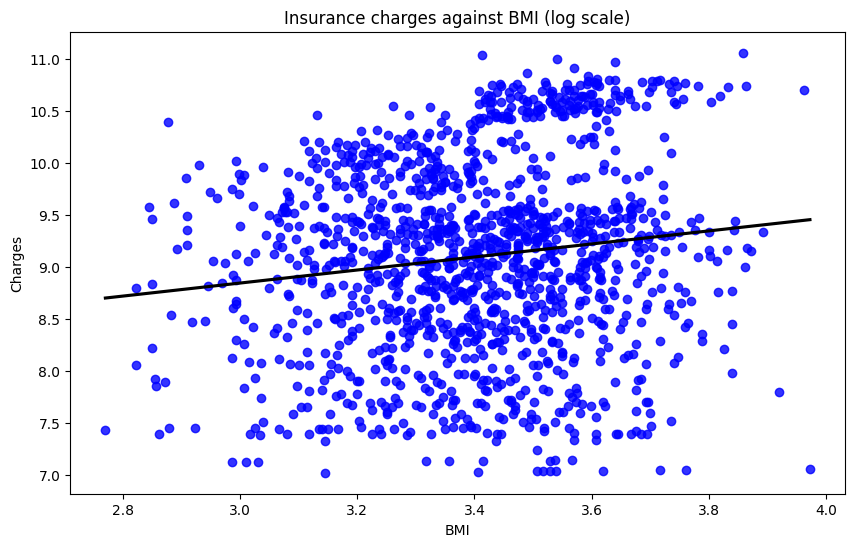

<Figure size 640x480 with 0 Axes>

In [31]:
### transforming both variables
plt.figure(figsize = (10, 6))
sns.regplot(x = np.log(medical_data["bmi"]),
                y = np.log(medical_data["charges"]),
                ci = None,
                scatter_kws = {"color": "blue"},
                line_kws = {"color": "black"})
plt.title("Insurance charges against BMI (log scale)")
plt.ylabel("Charges")
plt.xlabel("BMI")
plt.show()
plt.clf()

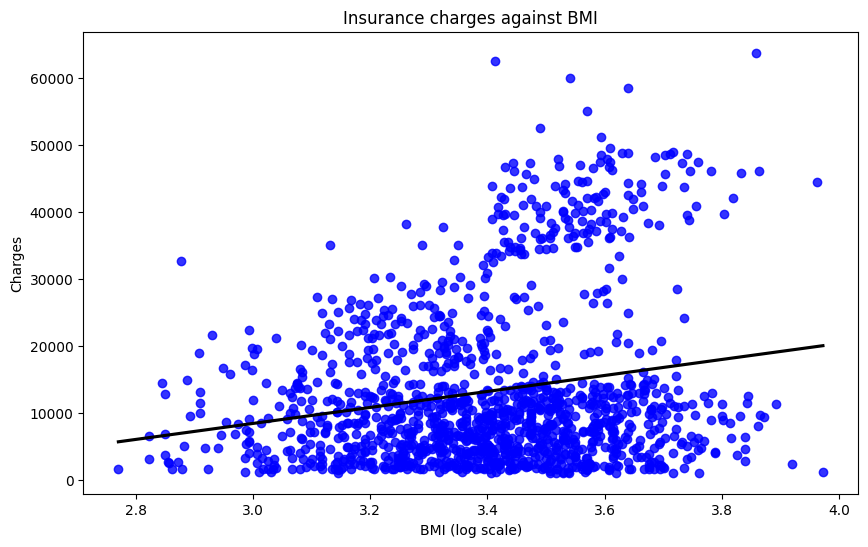

<Figure size 640x480 with 0 Axes>

In [32]:
### transforming BMI only
plt.figure(figsize = (10, 6))
sns.regplot(x = np.log(medical_data["bmi"]),
                y = medical_data["charges"],
                ci = None,
                scatter_kws = {"color": "blue"},
                line_kws = {"color": "black"})
plt.title("Insurance charges against BMI")
plt.ylabel("Charges")
plt.xlabel("BMI (log scale)")
plt.show()
plt.clf()

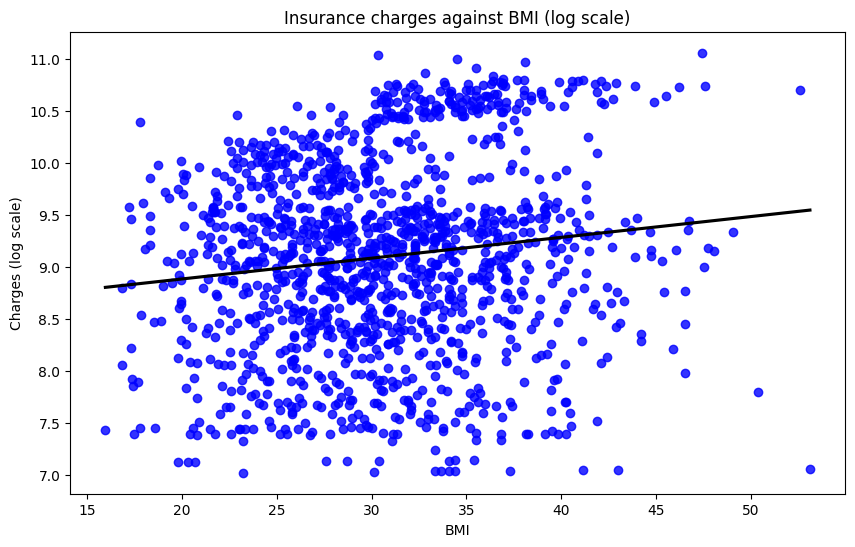

<Figure size 640x480 with 0 Axes>

In [33]:
### transforming charges only
plt.figure(figsize = (10, 6))
sns.regplot(x = medical_data["bmi"],
                y = np.log(medical_data["charges"]),
                ci = None,
                scatter_kws = {"color": "blue"},
                line_kws = {"color": "black"})
plt.title("Insurance charges against BMI (log scale)")
plt.ylabel("Charges (log scale)")
plt.xlabel("BMI")
plt.show()
plt.clf()

Findings:
- The relationship between patients' BMI and their insurance cost doesn't appear to be linear.
- A lot of the points are clustered in the lower insurance costs, but a considerable portion is also spread out on the upper end with no apparent linear pattern.
    - These two clusters appear to be due to whether the patient smokes or not, supporting the idea that an interaction term migth be needed in order to capture this relationship.

#### Charges and children

C:\Users\david\AppData\Local\Temp\ipykernel_33148\1048244576.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = charges_children_dict.keys(),


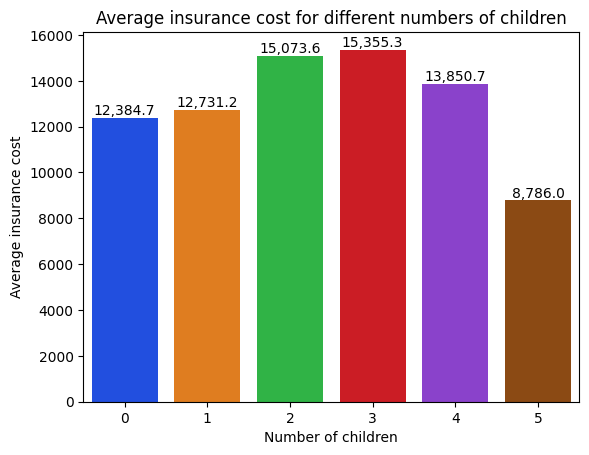

<Figure size 640x480 with 0 Axes>

In [34]:
charges_children = medical_data.groupby("children")["charges"].mean().reset_index()
charges_children_dict = {}

for key, val in zip(charges_children["children"], charges_children["charges"]):
    charges_children_dict[key] = val

ax = sns.barplot(x = charges_children_dict.keys(),
            y = charges_children_dict.values(),
            palette = "bright")

for c in ax.containers:
    ax.bar_label(c, fmt = "{:,.1f}")

plt.title("Average insurance cost for different numbers of children")
plt.ylabel("Average insurance cost")
plt.xlabel("Number of children")
plt.show()
plt.clf()

In [35]:
### ANOVA test to determine whether these differences are statistically significant
ch0 = medical_data["charges"][medical_data["children"] == 0]
ch1 = medical_data["charges"][medical_data["children"] == 1]
ch2 = medical_data["charges"][medical_data["children"] == 2]
ch3 = medical_data["charges"][medical_data["children"] == 3]
ch4 = medical_data["charges"][medical_data["children"] == 4]
ch5 = medical_data["charges"][medical_data["children"] == 5]

fstat, pval = f_oneway(ch0, ch1, ch2, ch3, ch4, ch5)
print("ANOVA p-value: {}".format(pval))

ANOVA p-value: 0.006133448188169501


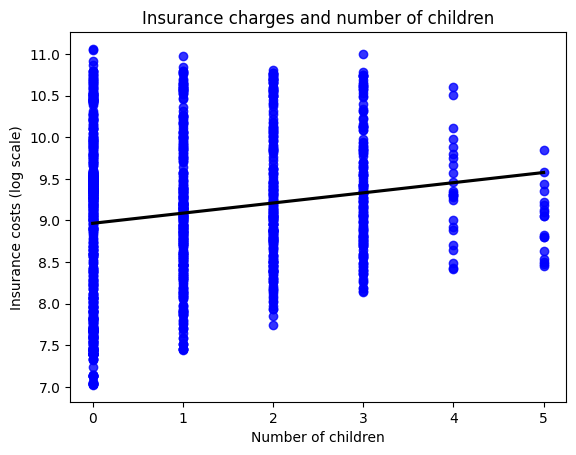

<Figure size 640x480 with 0 Axes>

In [36]:
### transforming charges only
sns.regplot(x = medical_data["children"],
            y = np.log(medical_data["charges"]),
            ci = None,
            line_kws = {"color": "black"},
            scatter_kws = {"color": "blue"})
plt.title("Insurance charges and number of children")
plt.xlabel("Number of children")
plt.ylabel("Insurance costs (log scale)")
plt.show()
plt.clf()

Findings:
- There are differences in the average insurance costs for patients with different numbers of children, and they are statistically signficant according to our ANOVA test.

#### Charges and region

C:\Users\david\AppData\Local\Temp\ipykernel_33148\3412515866.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = charges_region_dict.keys(),


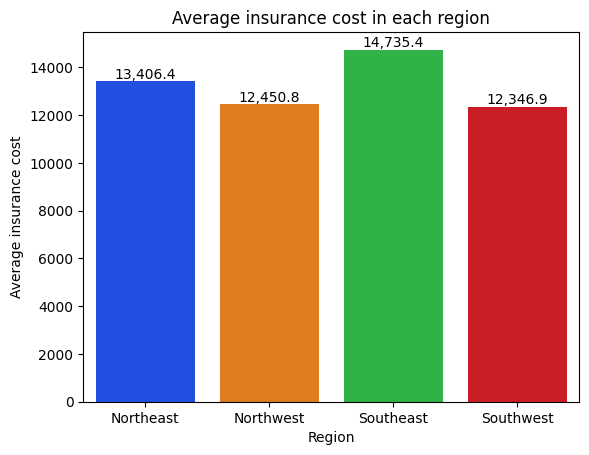

<Figure size 640x480 with 0 Axes>

In [37]:
charges_region = medical_data.groupby("region")["charges"].mean().reset_index()
charges_region_dict = {}

for key, val in zip(charges_region["region"], charges_region["charges"]):
    charges_region_dict[key.title()] = val

ax = sns.barplot(x = charges_region_dict.keys(),
              y = charges_region_dict.values(),
              palette = "bright")

for c in ax.containers:
    ax.bar_label(c, fmt = "{:,.1f}")

plt.title("Average insurance cost in each region")
plt.ylabel("Average insurance cost")
plt.xlabel("Region")
plt.show()
plt.clf()

In [38]:
### ANOVA test
charges_ne = medical_data["charges"][medical_data["region"] == "northeast"]
charges_nw = medical_data["charges"][medical_data["region"] == "northwest"]
charges_se = medical_data["charges"][medical_data["region"] == "southeast"]
charges_sw = medical_data["charges"][medical_data["region"] == "southwest"]

fstat, pval = f_oneway(charges_ne, charges_nw, charges_se, charges_sw)
print("ANOVA p-value: {}".format(pval))

ANOVA p-value: 0.03276288025444947


Findings:
- The average insurance cost is different across the four regions analyzed.
- Also, according to our ANOVA test, these differences are statistically significant.

# Linear regression to predict insurance costs

## Preparing the data

First thing we'll do one-hot encode all of our categorical variables so that they can be used by the model. Then, we'll split the data into our training and test sets.<br><br>
Also, it's important to keep in mind:
- Given that we identified that the non-linear relationship between BMI and insurance costs is very highly due to whether patients smoke, an interaction term between these two variables will be included.
    - In order to avoid multicollinearity issues, we'll standardize the variables.

In [39]:
# isolate features and target variable
features = medical_data[["age", "sex", "bmi", "children", "smoker", "region", "is_obese"]]
X = pd.get_dummies(data = features, columns = ["sex", "smoker", "region", "is_obese"], drop_first = True)
y = np.log(medical_data["charges"])

# code True as 1 and False as 0
cat_cols = ["sex_male", "smoker_1", "region_northwest", "region_southeast", "region_southwest", "is_obese_True"]
map_dict = {True: 1, False: 0}

for col in cat_cols:
    X[col] = X[col].map(map_dict)

# adding interaction terms
# X["bmi_smoker"] = X["bmi"] * X["smoker_1"]
X["age_smoker"] = X["age"] * X["smoker_1"]
X["obese_smoker"] = X["is_obese_True"] * X["smoker_1"]

# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# standardizing numerical variables
scaler_age = StandardScaler()
scaler_bmi = StandardScaler()
scaler_children = StandardScaler()

X_train["age"] = scaler_age.fit_transform(np.array(X_train["age"]).reshape(-1, 1))
X_train["bmi"] = scaler_bmi.fit_transform(np.array(X_train["bmi"]).reshape(-1, 1))
X_train["children"] = scaler_children.fit_transform(np.array(X_train["children"]).reshape(-1, 1))

X_test["age"] = scaler_age.transform(np.array(X_test["age"]).reshape(-1, 1))
X_test["bmi"] = scaler_bmi.transform(np.array(X_test["bmi"]).reshape(-1, 1))
X_test["children"] = scaler_children.transform(np.array(X_test["children"]).reshape(-1, 1))

display(X_train)

,age,bmi,children,sex_male,smoker_1,region_northwest,region_southeast,region_southwest,is_obese_True,age_smoker,obese_smoker
1113,-1.157680,-0.996928,-0.907908,1,0,0,0,0,0,0,0
967,-1.300619,-0.792762,0.766904,1,0,0,0,0,0,0,0
598,0.914926,1.154664,0.766904,0,0,1,0,0,1,0,0
170,1.701087,1.806837,-0.907908,1,0,0,1,0,1,0,0
275,0.557580,-0.651417,0.766904,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1095,0.843457,0.730628,0.766904,0,1,0,0,0,1,51,1
1130,-0.871804,2.539188,0.766904,1,0,0,0,1,1,0,0
1294,-1.372088,-1.411872,-0.070502,1,0,0,0,1,0,0,0
860,-0.085643,-0.419974,1.604310,0,0,0,0,1,0,0,0


## Checking for correlations between the regressors

In [40]:
vif_results = pd.DataFrame({
    "feature": X_train.columns,
    "VIF": np.zeros(len(X_train.columns))
})

for i in range(len(X_train.columns)):
    vif_val = variance_inflation_factor(X_train, i)
    vif_results.loc[i, "VIF"] = vif_val

display(vif_results)

,feature,VIF
0,age,1.286634
1,bmi,2.144873
2,children,1.007910
3,sex_male,1.823185
4,smoker_1,11.554064
5,region_northwest,1.570389
6,region_southeast,1.640875
7,region_southwest,1.551939
8,is_obese_True,3.899049
9,age_smoker,10.657172


Findings:
- None of the coefficients show concerning levels of correlation.
- The only coefficient that presents a larger VIF value is the interaction term for age and smoker.
    - This is to be expected, as interaction terms are built from other variables and they are bound to have higher levels of correlation.
    - If after fitting the model we find that the standard error is too large or the p-value shows that the coefficient is not significant, we could choose to drop it. Otherwise, a larger VIF in this specific case is not reason enough to drop it.

## Fitting and evaluating the model

### Checking coefficients, MSE, and RMSE

In [41]:
mlr = LinearRegression()
mlr.fit(X_train, y_train)

print("Regression intercept: {}".format(mlr.intercept_))
for i in range(len(X_train.columns)):
    print("Feature: {} | Coefficient: {}".format(X_train.columns[i], mlr.coef_[i]))

print("R^2 train: {}".format(mlr.score(X_train, y_train)))
print("R^2 test: {}".format(mlr.score(X_test, y_test)))

Regression intercept: 8.89743282400044
Feature: age | Coefficient: 0.5770106582116024
Feature: bmi | Coefficient: 0.017090979887667446
Feature: children | Coefficient: 0.1290938298587916
Feature: sex_male | Coefficient: -0.07898786452007506
Feature: smoker_1 | Coefficient: 2.478188171971088
Feature: region_northwest | Coefficient: -0.024746864507454957
Feature: region_southeast | Coefficient: -0.09984868709836221
Feature: region_southwest | Coefficient: -0.1303226610687136
Feature: is_obese_True | Coefficient: -0.01638409671485248
Feature: age_smoker | Coefficient: -0.03369006038637396
Feature: obese_smoker | Coefficient: 0.6998917719045588
R^2 train: 0.8149886880629506
R^2 test: 0.877602580967725


The model's R<sup>2</sup> is high at 0.815 for the training data and even higher at 0.877 for the test data (though this could be just because this particular split led to easier-to-predict points in the test set).

In [42]:
stats_ols = sm.OLS(y_train, add_constant(X_train)).fit()
print(stats_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     423.3
Date:                Sat, 27 Dec 2025   Prob (F-statistic):               0.00
Time:                        15:15:25   Log-Likelihood:                -510.04
No. Observations:                1069   AIC:                             1044.
Df Residuals:                    1057   BIC:                             1104.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                8.8974      0.036  

Findings:
- bmi, region_northwest, and is_obese_True are not statistically significant.
    - This is not necessarily an issue given that the main objective here is predictive capability.
    - We will, however, double check this later on with an embedded feature selection method.
- age_smoker shows a low standard error and is statistically significant, which supports the idea we don't necessarily need to drop it even though its VIF value was higher.

In [43]:
y_pred_test = mlr.predict(X_test)
y_pred_train = mlr.predict(X_train)

### MSE
mse_train = mean_squared_error(np.exp(y_train), np.exp(y_pred_train))
mse_test = mean_squared_error(np.exp(y_test), np.exp(y_pred_test))

print("Train MSE: {} | RMSE: {}".format(mse_train, mse_train ** 0.5))
print("Test MSE: {} | RMSE: {}".format(mse_test, mse_test ** 0.5))

Train MSE: 25038209.72477251 | RMSE: 5003.81951360883
Test MSE: 21951968.317126375 | RMSE: 4685.2927674934435


The RMSE is relatively similar between the training and test sets, which is optimal. This suggests that the model is generalizing well to unseen data and that we're not modelling noise (overfitting). Now, we see again a better performance on the test set than on the training set, so it's likely that this particular split of the data made this possible.

### Visual inspection

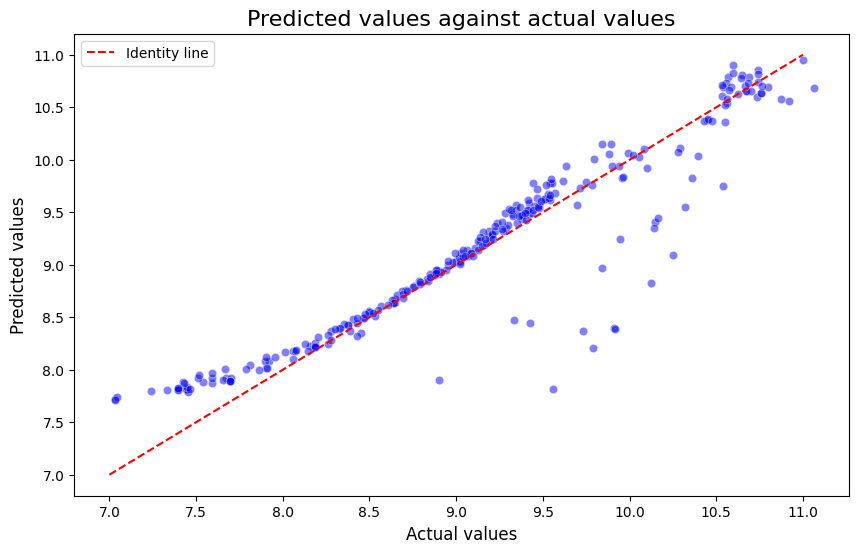

<Figure size 640x480 with 0 Axes>

In [44]:
plt.figure(figsize = (10, 6))
sns.scatterplot(x = y_test, 
                y = y_pred_test, 
                color = "blue", 
                alpha = 0.5)
sns.lineplot(x = range(7, 12), 
             y = range(7, 12), 
             color = "red", 
             linestyle = "dashed", 
             label = "Identity line")
plt.title("Predicted values against actual values", fontsize = 16)
plt.xlabel("Actual values", fontsize = 12)
plt.ylabel("Predicted values", fontsize = 12)
plt.legend()
plt.show()
plt.clf()

As we can see, the model appears to be performing much better when estimating lower insurance costs, as all the dots are very closely grouped to the identity line. However, there is a noticeable cluster being underestimated, so we can try adding a smearing factor to see if we can fix this issue.

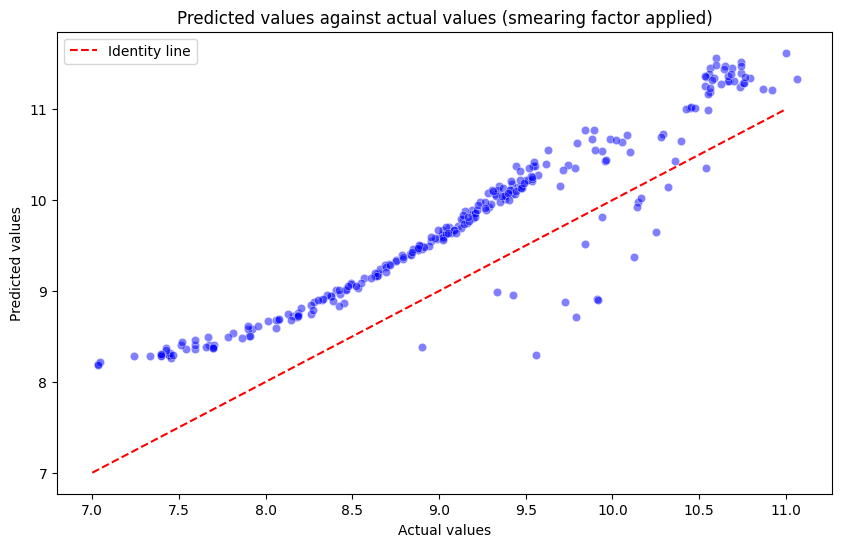

<Figure size 640x480 with 0 Axes>

In [45]:
### add a smearing factor
resid_test = y_test - y_pred_test
resid_train = y_train - y_pred_train
smearing_factor = np.mean(np.exp(resid_test))

# check what the predictions look like using the smearing factor
plt.figure(figsize = (10, 6))
sns.scatterplot(x = y_test,
                y = y_pred_test * smearing_factor,
                color = "blue",
                alpha = 0.5)
sns.lineplot(x = range(7, 12), 
             y = range(7, 12), 
             color = "red", 
             linestyle = "dashed", 
             label = "Identity line")
plt.title("Predicted values against actual values (smearing factor applied)")
plt.ylabel("Predicted values")
plt.xlabel("Actual values")
plt.legend()
plt.show()
plt.clf()

The smearing factor appears to be effective at drawing the cluster closer to the identity line, although it does so at the cost of overestimating the rest of the entire dataset. Hence, a segment-specific smearing factor might be better here. In order to determine be able to calculate the smearing factor for this segment, we first need to find out what patients make up the segment in question.

In [46]:
sf_df = X_test[X_test.columns]
sf_df["age"] = scaler_age.inverse_transform(np.array(sf_df["age"]).reshape(-1, 1))
sf_df["bmi"] = scaler_bmi.inverse_transform(np.array(sf_df["bmi"]).reshape(-1, 1))
sf_df["children"] = scaler_children.inverse_transform(np.array(sf_df["children"]).reshape(-1, 1))
sf_df["charges"] = np.exp(y_test)
sf_df["predicted_charges"] =  np.exp(y_pred_test)
sf_df["actual-pred"] = sf_df["charges"] - sf_df["predicted_charges"]
display(sf_df.sort_values(by = "actual-pred", ascending = False))

,age,bmi,children,sex_male,smoker_1,region_northwest,region_southeast,region_southwest,is_obese_True,age_smoker,obese_smoker,charges,predicted_charges,actual-pred
1302,43.0,27.800,0.0,1,1,0,0,1,0,43,0,37829.72420,17145.059939,20684.664261
543,54.0,47.410,0.0,0,1,0,1,0,1,54,1,63770.42801,43515.563038,20254.864972
986,45.0,27.645,1.0,0,0,1,0,0,0,0,0,28340.18885,8907.567089,19432.621761
636,35.0,38.095,2.0,0,0,0,0,0,1,0,0,24915.04626,6824.429179,18090.617081
818,33.0,35.530,0.0,0,1,1,0,0,1,33,1,55135.40209,38711.538405,16423.863685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1185,20.0,35.625,3.0,1,1,1,0,0,1,20,1,37465.34375,44862.430071,-7397.086321
312,43.0,35.970,3.0,1,1,0,1,0,1,43,1,42124.51530,49555.204129,-7430.688829
298,31.0,34.390,3.0,1,1,1,0,0,1,31,1,38746.35510,48576.696346,-9830.341246
666,40.0,32.775,2.0,0,1,1,0,0,1,40,1,40003.33225,50269.600989,-10266.268739


looking at the rows with the largest residuals, there doesn't appear to be a clear pattern on what makes this patients be consistently underestimated. They don't seem to all be smokers, obese, belong to a particular region, have a particular number of children, etc. There doesn't appear to be anything we can model so as to account for this.<br><br>
With this in mind, it's very likely that the reason why these patients are being charged so much when none of our features point towards them being higher cost patients is due to an unseen feature. If any of these patients have any illnesses or pre-existing conditions, this could be significantly driving up their insurance cost.<br><br>
The largest residual is a clear example of this, a 45 year old male smoker who's not obese and has no children is paying almost $40,000 in insurance. Nothing in our data points towards why this individual should be paying this much, yet he does. It's very likely that this increased rate comes from something else driving up the price.

### Lasso

Even though the model doesn't appear to be overfitting the data, the fact that some of the coefficients are not statistically significant suggests that there might be room for simplification. With this in mind, we can try fitting a model with L1 regularization to see if any of the coefficients are set to 0 while still retaining the model's performance.

In [47]:
alphas = [i/10 for i in range(101)]

l1_results = pd.DataFrame({
    "alpha": [],
    "R2_train": [],
    "R2_test": [],
    "RMSE_train": [],
    "RMSE_test": []
})

l1_coefs = pd.DataFrame(data = [], columns = X_train.columns)

for a in alphas:
    model = Lasso(alpha = a)
    model.fit(X_train, y_train)

    # statistics
    r2_train = model.score(X_train, y_train)
    r2_test = model.score(X_test, y_test)
    rmse_train = mean_squared_error(np.exp(y_train), np.exp(model.predict(X_train))) ** 0.5
    rmse_test = mean_squared_error(np.exp(y_test), np.exp(model.predict(X_test))) ** 0.5

    # saving results
    model_results = pd.DataFrame({
    "alpha": a,
    "R2_train": r2_train,
    "R2_test": r2_test,
    "RMSE_train": rmse_train,
    "RMSE_test": rmse_test
    }, index = [1])

    coefs = pd.DataFrame(data = (model.coef_).reshape(1, len(X_train.columns)), 
                         columns = X_train.columns, 
                         index = [1])

    l1_results = pd.concat([l1_results, model_results])
    l1_coefs = pd.concat([l1_coefs, coefs])

l1_results = l1_results.reset_index(drop = True)
l1_coefs = l1_coefs.reset_index(drop = True)

display(l1_results)

c:\Users\david\OneDrive\Escritorio\Trabajo\Python\0_portfolio_projects\1_us_insurance_costs\.venv\Lib\site-packages\sklearn\base.py:1336: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
c:\Users\david\OneDrive\Escritorio\Trabajo\Python\0_portfolio_projects\1_us_insurance_costs\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:716: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\Users\david\OneDrive\Escritorio\Trabajo\Python\0_portfolio_projects\1_us_insurance_costs\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:716: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.126e+01, tolerance: 8.785e-0

,alpha,R2_train,R2_test,RMSE_train,RMSE_test
0,0.0,0.814989,0.877603,5003.819514,4685.292767
1,0.1,0.580686,0.658089,10686.054186,10804.849067
2,0.2,0.539591,0.613586,9669.215935,9863.553438
3,0.3,0.478415,0.552077,8940.504072,9132.423059
4,0.4,0.396088,0.471555,8515.509213,8760.980372
...,...,...,...,...,...
96,9.6,0.000000,-0.001852,12415.090615,14588.492548
97,9.7,0.000000,-0.001852,12415.090615,14588.492548
98,9.8,0.000000,-0.001852,12415.090615,14588.492548
99,9.9,0.000000,-0.001852,12415.090615,14588.492548


In [48]:
display(l1_coefs)

for col in l1_coefs:
    if (l1_coefs[col] == 0).any():
        print("Feature: '{}' was set to zero at alpha = {}".format(col, l1_results["alpha"].iloc[list(l1_coefs[col]).index(0)]))
        print("Index: {}\n".format(list(l1_coefs[col]).index(0)))
    else:
        continue

,age,bmi,children,sex_male,smoker_1,region_northwest,region_southeast,region_southwest,is_obese_True,age_smoker,obese_smoker
0,0.577011,0.017091,0.129094,-0.078988,2.478188,-0.024747,-0.099849,-0.130323,-0.016384,-0.033690,0.699892
1,0.298629,0.000000,0.017467,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.031803,0.000000
2,0.198543,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.032295,0.000000
3,0.097545,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.032747,0.000000
4,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033171,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
96,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
97,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
98,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
99,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Feature: 'age' was set to zero at alpha = 0.4
Index: 4

Feature: 'bmi' was set to zero at alpha = 0.1
Index: 1

Feature: 'children' was set to zero at alpha = 0.2
Index: 2

Feature: 'sex_male' was set to zero at alpha = 0.1
Index: 1

Feature: 'smoker_1' was set to zero at alpha = 0.1
Index: 1

Feature: 'region_northwest' was set to zero at alpha = 0.1
Index: 1

Feature: 'region_southeast' was set to zero at alpha = 0.1
Index: 1

Feature: 'region_southwest' was set to zero at alpha = 0.1
Index: 1

Feature: 'is_obese_True' was set to zero at alpha = 0.1
Index: 1

Feature: 'age_smoker' was set to zero at alpha = 9.3
Index: 93

Feature: 'obese_smoker' was set to zero at alpha = 0.1
Index: 1



Lasso is able to filter out some of our features, though this comes at the cost of a lower R<sup>2</sup> and a larger RMSE both for the training and test sets. Hence, while we could get rid of these features, we would be hurting the model.

### Residual analysis

Our model's residuals should be:
- Independent.
- Normally distributed.
- Homoscedastic.

#### Independence

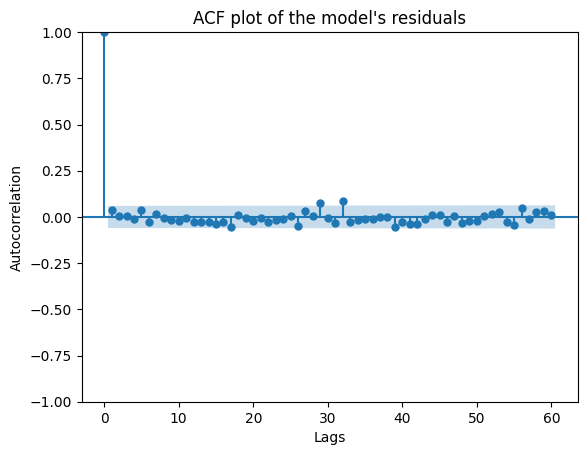

<Figure size 640x480 with 0 Axes>

In [49]:
resid = y_train - mlr.predict(X_train)

plot_acf(resid, lags = 60)
plt.title("ACF plot of the model's residuals")
plt.ylabel("Autocorrelation")
plt.xlabel("Lags")
plt.show()
plt.clf()

The residuals are independent from each other.

#### Normality

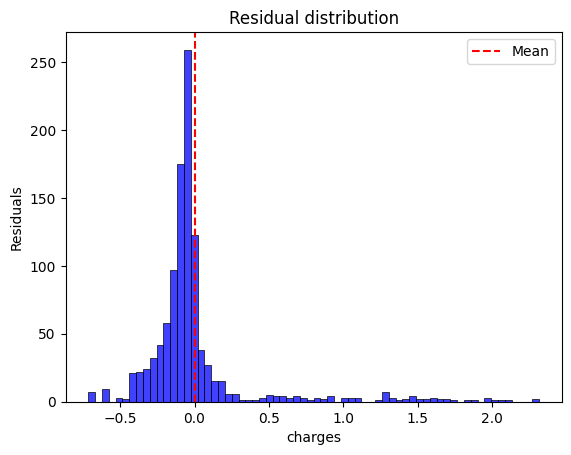

<Figure size 640x480 with 0 Axes>

In [50]:
sns.histplot(x = resid, color = "blue")
plt.axvline(np.mean(resid), color = "red", linestyle = "dashed", label = "Mean")
plt.title("Residual distribution")
plt.ylabel("Residuals")
plt.legend()
plt.show()
plt.clf()

The residuals don't appear to be normally distributed, as the distribution is right-skeweed.

#### Homoscedasticity

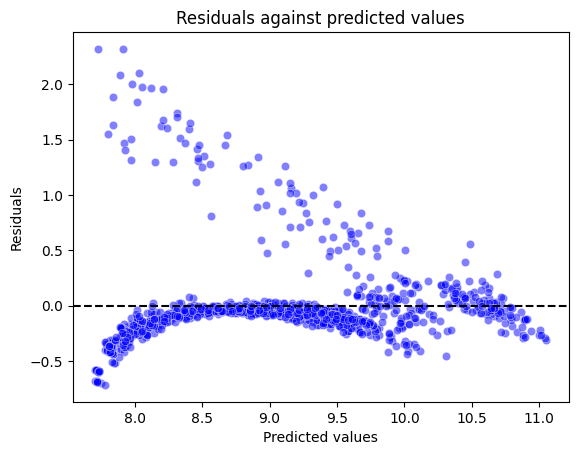

<Figure size 640x480 with 0 Axes>

In [51]:
sns.scatterplot(x = mlr.predict(X_train), y = resid, color = "blue", alpha = 0.5)
plt.axhline(0, color = "black", linestyle = "dashed")
plt.title("Residuals against predicted values")
plt.ylabel("Residuals")
plt.xlabel("Predicted values")
plt.show()
plt.clf()

The residuals are are not white noise, which is due to the high variance in insurance costs.